# CROP YIELD PREDICTION USING LINEAR REGRESSION

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Akshaj000/CropYieldPrediction-LinearRegression/blob/main/notebook.ipynb)



## Importing the Required modules and libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Reading and Analysing the data

In [2]:
data = pd.read_csv('./dataset.csv')
data

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"
...,...,...,...,...,...,...,...,...,...
995,614,6.379,94.132,11.571,5,98.673,2.891,6,"c,b"
996,490,6.980,82.727,11.264,5,101.090,3.500,6,"d,c,b"
997,392,NaN,58.218,11.859,4,103.673,4.005,6,"c,b,a"
998,773,10.070,67.905,11.567,4,104.343,2.339,6,a


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   water             958 non-null    float64
 2   uv                949 non-null    float64
 3   area              1000 non-null   float64
 4   fertilizer_usage  1000 non-null   int64  
 5   yield             1000 non-null   float64
 6   pesticides        1000 non-null   float64
 7   region            1000 non-null   int64  
 8   categories        1000 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 70.4+ KB


In [4]:
data.drop('id', inplace=True, axis=1)
data.drop('categories', inplace=True, axis=1)

In [5]:
data.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
0,5.615,65.281,3.230,0,7.977,8.969,0
1,7.044,73.319,9.081,0,23.009,7.197,0
2,5.607,60.038,2.864,2,23.019,7.424,0
3,9.346,64.719,2.797,2,28.066,1.256,0
4,7.969,NaN,5.407,1,29.140,0.274,0


In [6]:
data.fillna(0, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   water             1000 non-null   float64
 1   uv                1000 non-null   float64
 2   area              1000 non-null   float64
 3   fertilizer_usage  1000 non-null   int64  
 4   yield             1000 non-null   float64
 5   pesticides        1000 non-null   float64
 6   region            1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [8]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,11.710157,70.185656,8.098848,2.12300,58.758571,3.452301,3.039000
std,168.691836,18.922905,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.000000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.262000,65.744500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.348000,72.868000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.611000,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


In [9]:
data.shape

(1000, 7)

In [10]:
data.columns

Index(['water', 'uv', 'area', 'fertilizer_usage', 'yield', 'pesticides',
       'region'],
      dtype='object')

## Visualising the data

<AxesSubplot:xlabel='yield', ylabel='Count'>

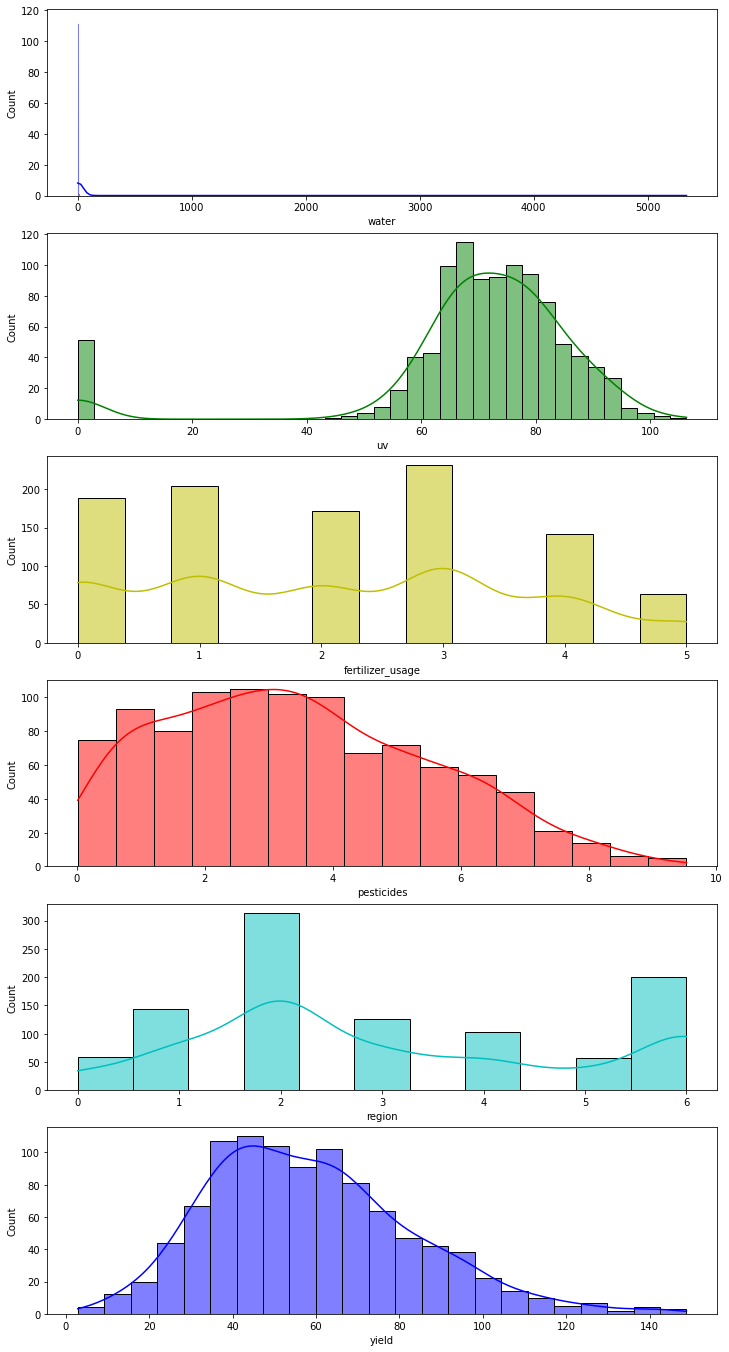

In [11]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.histplot(data.water,color='b',ax=ax[0], kde=True)
sns.histplot(data.uv,color='g',ax=ax[1], kde=True)
sns.histplot(data.fertilizer_usage,color='y',ax=ax[2], kde=True)
sns.histplot(data.pesticides,color='r',ax=ax[3], kde=True)
sns.histplot(data.region,color='c',ax=ax[4], kde=True)
sns.histplot(data['yield'],color='b',ax=ax[5], kde=True)

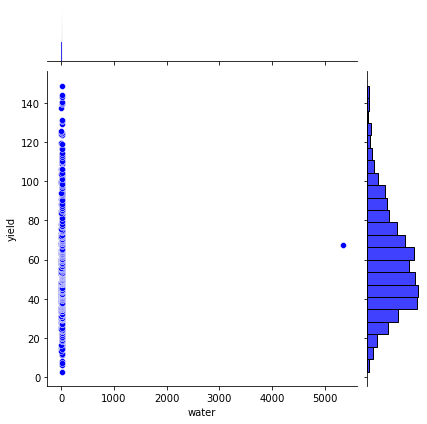

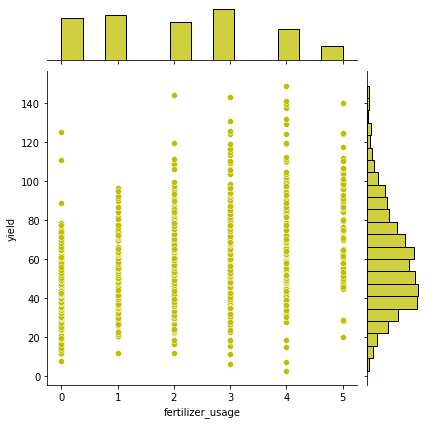

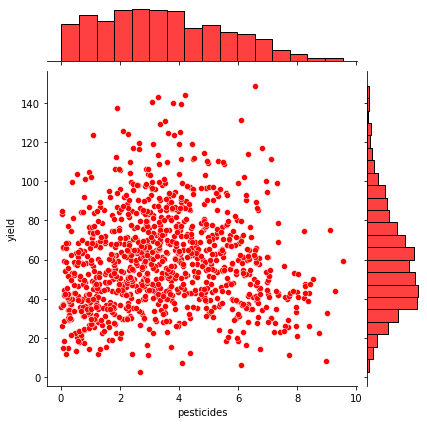

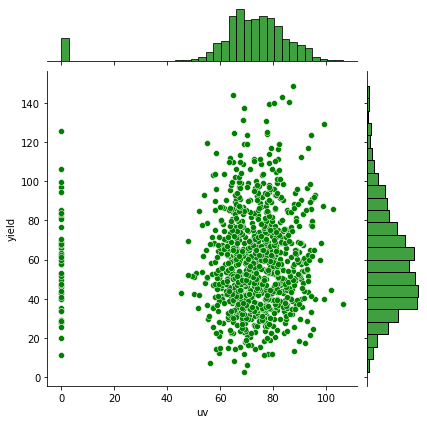

In [12]:
sns.jointplot(x='water',y='yield',data=data, color='b', ax=ax[0])
sns.jointplot(x='fertilizer_usage', y='yield',data=data, color='y')
sns.jointplot(x='pesticides', y='yield',data=data, color='r')
sns.jointplot(x='uv', y='yield',data=data, color='g')

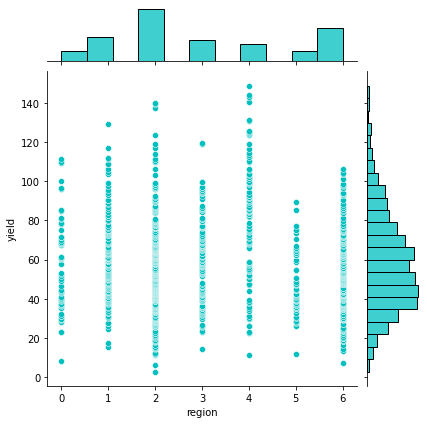

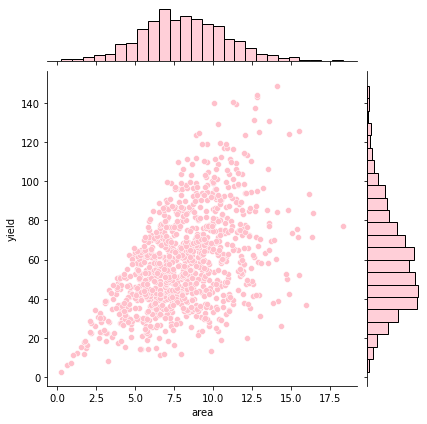

In [13]:
sns.jointplot(x='region', y='yield',data=data, color='c')
sns.jointplot(x='area', y='yield',data=data, color='pink')

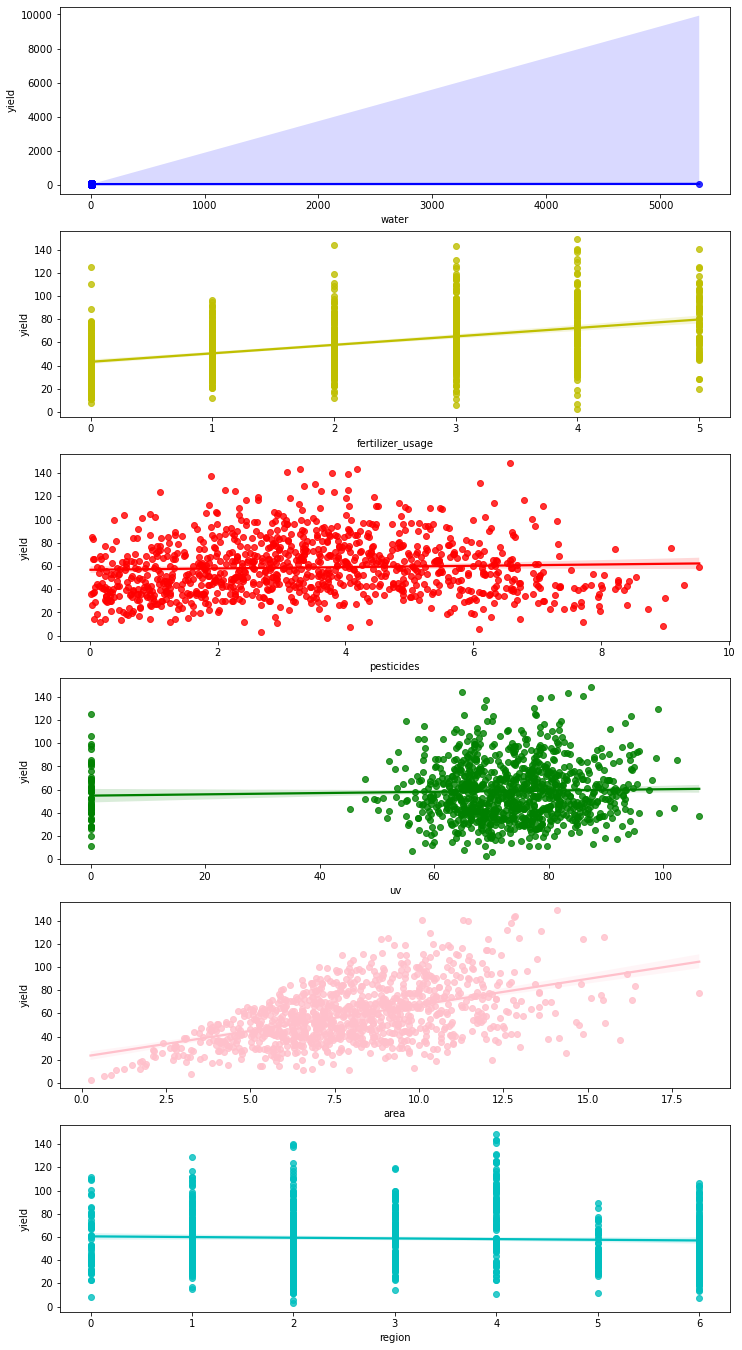

In [14]:
f, ax = plt.subplots(6, figsize=(12,24))
sns.regplot(x="water", y="yield", data=data, color='b', ax=ax[0]);
sns.regplot(x="fertilizer_usage", y="yield", data=data, color='y', ax=ax[1]);
sns.regplot(x="pesticides", y="yield", data=data, color='r', ax=ax[2]);
sns.regplot(x="uv", y="yield", data=data, color='g', ax=ax[3]);
sns.regplot(x="area", y="yield", data=data, color='pink', ax=ax[4]);
sns.regplot(x="region", y="yield", data=data, color='c', ax=ax[5]);

In [15]:
corr=data.corr()
corr.style.background_gradient(cmap="inferno")

,water,uv,area,fertilizer_usage,yield,pesticides,region
water,1.000000,0.035519,0.000132,0.003419,0.014446,-0.008056,-0.050885
uv,0.035519,1.000000,0.063638,-0.020593,0.042384,-0.002886,0.003181
area,0.000132,0.063638,1.000000,-0.202512,0.491220,0.036302,0.369481
fertilizer_usage,0.003419,-0.020593,-0.202512,1.000000,0.452183,-0.056462,0.022406
yield,0.014446,0.042384,0.491220,0.452183,1.000000,0.048380,-0.045051
pesticides,-0.008056,-0.002886,0.036302,-0.056462,0.048380,1.000000,-0.010899
region,-0.050885,0.003181,0.369481,0.022406,-0.045051,-0.010899,1.000000


From the above figures we can see that pesticides, area and Uv has more effect on yield. Water does'nt effect the yield at all.

## Spliting Data to Training and Testing.

In [16]:
np.random.seed(0)
data_train, data_test = train_test_split(
    data, train_size = 0.8, 
    test_size = 0.2, 
    random_state = 100
)

In [17]:
data_train.head()

,water,uv,area,fertilizer_usage,yield,pesticides,region
675,4.923,90.242,7.524,4,68.295,0.164,4
358,1.598,71.792,8.305,1,52.913,6.187,2
159,4.064,81.622,7.495,3,72.568,3.344,1
533,8.684,57.248,10.176,1,36.008,0.014,3
678,6.084,70.801,10.207,1,69.490,3.103,4


In [18]:
data.describe()

,water,uv,area,fertilizer_usage,yield,pesticides,region
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,11.710157,70.185656,8.098848,2.12300,58.758571,3.452301,3.039000
std,168.691836,18.922905,2.692632,1.52256,24.563683,2.076921,1.883886
min,0.000000,0.000000,0.263000,0.00000,2.843000,0.014000,0.000000
25%,4.262000,65.744500,6.297000,1.00000,40.698000,1.804500,2.000000
50%,6.348000,72.868000,7.987500,2.00000,55.602500,3.275500,2.000000
75%,8.611000,80.220250,9.900250,3.00000,73.645500,4.916000,5.000000
max,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000


### Considering all the columns to predict yield

In [19]:
X_train = data_train.iloc[:, [0,1,2,3,5,6]]
y_train = data_train['yield']
X_test = data_test.iloc[:, [0,1,2,3,5,6]]
y_test = data_test['yield']

In [20]:
y_train.head()

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
Name: yield, dtype: float64

In [21]:
X_train.head()

,water,uv,area,fertilizer_usage,pesticides,region
675,4.923,90.242,7.524,4,0.164,4
358,1.598,71.792,8.305,1,6.187,2
159,4.064,81.622,7.495,3,3.344,1
533,8.684,57.248,10.176,1,0.014,3
678,6.084,70.801,10.207,1,3.103,4


In [22]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)
y_train_pred[:20]

array([67.19525744, 54.76872973, 72.01087223, 58.84579883, 56.69636444,
       66.24971921, 67.19037761, 35.51333748, 67.30141764, 83.97884208,
       85.83500912, 58.22322856, 81.80072519, 61.48744136, 41.02119663,
       65.27456928, 62.13200389, 70.28443896, 66.78049939, 57.61758889])

In [23]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))


Mean squared error :  211.3300699831843
Root Mean Squared error :  14.537196083949075


In [24]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.6464919789548195  R square value of test data:  0.6810218136307852


### Considering attributes those are result of feature selection

In [25]:
rfe = RFE(reg)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('water', False, 4),
 ('uv', False, 3),
 ('area', True, 1),
 ('fertilizer_usage', True, 1),
 ('pesticides', False, 2),
 ('region', True, 1)]

In [26]:
X_train.columns[rfe.support_]

Index(['area', 'fertilizer_usage', 'region'], dtype='object')

In [27]:
X_train = data_train.iloc[:, [2,3,6]]
X_test = data_test.iloc[:, [2,3,6]]
X_train.head()

,area,fertilizer_usage,region
675,7.524,4,4
358,8.305,1,2
159,7.495,3,1
533,10.176,1,3
678,10.207,1,4


In [28]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [29]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  212.74031234640768
Root Mean Squared error :  14.585620053546153


In [30]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.6435052166484538  R square value of test data:  0.6788932166384223


### Only considering Water to predict yield.

In [31]:
y_train = data_train['yield']
X_train = data_train.iloc[:, [0]]
y_test = data_test['yield']
X_test = data_test.iloc[:, [0]]

In [32]:
y_train.head()

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
Name: yield, dtype: float64

In [33]:
X_train.head()

,water
675,4.923
358,1.598
159,4.064
533,8.684
678,6.084


In [34]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)
y_train_pred[:10]

array([58.36244673, 58.35558281, 58.36067346, 58.37021071, 58.36484343,
       58.36160242, 58.36918886, 58.37530343, 58.37189314, 58.36426128])

In [35]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  666.1110256453318
Root Mean Squared error :  25.809126789671357


In [36]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.00025786092815305306  R square value of test data:  -0.005417198308751425


### Only considering UV to predict yield.

In [37]:
y_train = data_train['yield']
X_train = data_train.iloc[:, [1]]
y_test = data_test['yield']
X_test = data_test.iloc[:, [1]]

In [38]:
X_train.head()

,uv
675,90.242
358,71.792
159,81.622
533,57.248
678,70.801


In [39]:
y_train.head()

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
Name: yield, dtype: float64

In [40]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [41]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  663.1216970715219
Root Mean Squared error :  25.751149432045203


In [42]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.0005270353533554095  R square value of test data:  -0.0009051541542615116


### Only considering area to predict yield.

In [43]:
X_train = data_train.iloc[:, [2]]
X_test = data_test.iloc[:, [2]]

In [44]:
X_train.head()

,area
675,7.524
358,8.305
159,7.495
533,10.176
678,10.207


In [45]:
y_train.head()

675    68.295
358    52.913
159    72.568
533    36.008
678    69.490
Name: yield, dtype: float64

In [46]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [47]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  465.67830761378804
Root Mean Squared error :  21.579580802550083


In [48]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.2227122562742917  R square value of test data:  0.29711270144399704


### Only considering fertilizer_usage to predict yield.

In [49]:
X_train = data_train.iloc[:, [3]]
X_test = data_test.iloc[:, [3]]

In [50]:
X_train.head()

,fertilizer_usage
675,4
358,1
159,3
533,1
678,1


In [51]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [52]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  533.0587635252961
Root Mean Squared error :  23.088065391567483


In [53]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.20586877480966415  R square value of test data:  0.19540973212640833


### Only considering pesticides to predict yield.

In [54]:
X_train = data_train.iloc[:, [5]]
X_test = data_test.iloc[:, [5]]
X_train.head()

,pesticides
675,0.164
358,6.187
159,3.344
533,0.014
678,3.103


In [55]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [56]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  662.2569831934104
Root Mean Squared error :  25.7343541437008


In [57]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.0006052339659345929  R square value of test data:  0.00040003097433960466


### Only considering region to predict yield.

In [58]:
X_train = data_train.iloc[:, [6]]
X_test = data_test.iloc[:, [6]]
X_train.head()

,region
675,4
358,2
159,1
533,3
678,4


In [59]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [60]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  662.7690489384782
Root Mean Squared error :  25.744301290547355


In [61]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.00047055254515937506  R square value of test data:  -0.0003728727713343538


In [62]:
l = []
c = []
for i in range(7):
    if i != 4:
        X_train = data_train.iloc[:, [i]]
        X_test = data_test.iloc[:, [i]]
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        y_test_pred=reg.predict(X_test)
        l.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
        c.append(data_test.columns[i])
print(l)
print(c)

[25.809126789671357, 25.751149432045203, 21.579580802550083, 23.088065391567483, 25.7343541437008, 25.744301290547355]
['water', 'uv', 'area', 'fertilizer_usage', 'pesticides', 'region']


<AxesSubplot:>

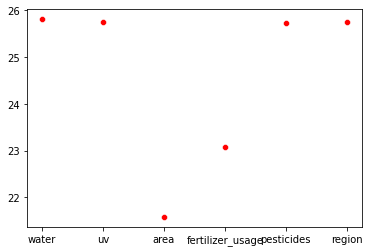

In [63]:
sns.scatterplot(x=c, y=l, color='r')

From the above data we can see that area has the least mean squared error followed by fertilizer usage.

### Considering area and water to predict yield.

In [64]:
X_train = data_train.iloc[:, [2,0]]
X_test = data_test.iloc[:, [2,0]]
X_train.head()

,area,water
675,7.524,4.923
358,8.305,1.598
159,7.495,4.064
533,10.176,8.684
678,10.207,6.084


In [65]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [66]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  465.6561556408714
Root Mean Squared error :  21.57906753409126


In [67]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.22296120383556195  R square value of test data:  0.29714613727329486


### Considering area and UV to predict yield

In [68]:
X_train = data_train.iloc[:, [2,1]]
X_test = data_test.iloc[:, [2,1]]
X_train.head()

,area,uv
675,7.524,90.242
358,8.305,71.792
159,7.495,81.622
533,10.176,57.248
678,10.207,70.801


In [69]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [70]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  467.13857125044916
Root Mean Squared error :  21.613388703543208


In [71]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.22284616896691545  R square value of test data:  0.2949086031513114


### Considering pesticides and area to predict yield

In [72]:
X_train = data_train.iloc[:, [5,2]]
X_test = data_test.iloc[:, [5,2]]
X_train.head()

,pesticides,area
675,0.164,7.524
358,6.187,8.305
159,3.344,7.495
533,0.014,10.176
678,3.103,10.207


In [73]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [74]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  464.15947912525075
Root Mean Squared error :  21.54436072677142


In [75]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.2232080658376161  R square value of test data:  0.29940519657598696


### Considering area and fertilizer usage to predict yield

In [76]:
X_train = data_train.iloc[:, [2,3]]
X_test = data_test.iloc[:, [2,3]]
X_train.head()

,area,fertilizer_usage
675,7.524,4
358,8.305,1
159,7.495,3
533,10.176,1
678,10.207,1


In [77]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [78]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  270.12908834520806
Root Mean Squared error :  16.435604289018645


In [79]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.547529992991408  R square value of test data:  0.5922715272238347


### Considering area and region to predict yield

In [80]:
X_train = data_train.iloc[:, [2,6]]
X_test = data_test.iloc[:, [2,6]]
X_train.head()

,area,region
675,7.524,4
358,8.305,2
159,7.495,1
533,10.176,3
678,10.207,4


In [81]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [82]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  404.57538643017267
Root Mean Squared error :  20.114059421960867


In [83]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.27290346040986413  R square value of test data:  0.38934046147152934


### Considering Area, Pesticides and Fertiliser to predict yield

In [84]:
X_train = data_train.iloc[:, [5,2,3]]
X_test = data_test.iloc[:, [5,2,3]]
X_train.head()

,pesticides,area,fertilizer_usage
675,0.164,7.524,4
358,6.187,8.305,1
159,3.344,7.495,3
533,0.014,10.176,1
678,3.103,10.207,1


In [85]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [86]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  269.00216351587585
Root Mean Squared error :  16.40128542266965


In [87]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.551565591840254  R square value of test data:  0.5939724893172245


### Considering Area, Pesticides, Fertilizer and region to predict yield

In [88]:
X_train = data_train.iloc[:, [5,2,3,6]]
X_test = data_test.iloc[:, [5,2,3,6]]
X_train.head()

,pesticides,area,fertilizer_usage,region
675,0.164,7.524,4,4
358,6.187,8.305,1,2
159,3.344,7.495,3,1
533,0.014,10.176,1,3
678,3.103,10.207,1,4


In [89]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_pred=reg.predict(X_train)

In [90]:
y_test_pred=reg.predict(X_test)
print("Mean squared error : ",mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared error : ",math.sqrt(mean_squared_error(y_test, y_test_pred)))

Mean squared error :  211.35557629908803
Root Mean Squared error :  14.538073335180561


In [91]:
r2_score_train=reg.score(X_train,y_train)
r2_score_test=reg.score(X_test,y_test)

print("R square value of train data: ",r2_score_train," R square value of test data: ",r2_score_test)

R square value of train data:  0.6464680867924696  R square value of test data:  0.6809833148104867
